### Create a regression dataset using scikit learn

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.datasets import make_regression

In [2]:
x, y = make_regression(n_samples=3000, n_features=25,
                       n_informative=28, noise=10, random_state=21)

In [3]:
x

array([[-0.06030132,  0.57260078,  0.19679663, ...,  0.09535084,
         0.81328367, -1.6748384 ],
       [ 0.2072955 , -1.36713951, -2.80778473, ..., -1.13806888,
         1.3920117 ,  0.98637127],
       [ 0.2407746 , -0.32222326,  0.30412961, ...,  0.69101589,
         0.85257955,  0.04610614],
       ...,
       [-0.52809176, -0.38893892,  1.1400362 , ..., -0.11651855,
        -0.11648571,  0.67108611],
       [-1.35400656,  0.3432716 ,  0.48553016, ..., -1.36654841,
         0.42975049,  0.72488143],
       [-0.51944868,  0.75040403, -0.28348986, ...,  0.83642785,
        -0.48183152,  1.28731684]])

In [4]:
x.shape

(3000, 25)

In [5]:
y

array([ -62.40523299, -113.27148952,   51.85858942, ...,  -19.57397116,
        -53.26797737,  366.0781158 ])

### Converting x and y to a dataframe

In [6]:
cols = [f'x{i+1}' for i in range(25)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25']

In [7]:
import pandas as pd 
x = pd.DataFrame(x, columns = cols)
x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,-0.060301,0.572601,0.196797,0.849309,-0.151271,0.603302,0.668919,-0.127491,-0.407493,-1.033919,...,0.447117,0.483024,-0.181287,-0.110091,0.372669,0.384173,-0.479245,0.095351,0.813284,-1.674838
1,0.207295,-1.367140,-2.807785,0.665635,-0.896433,-0.367675,1.271813,-2.012129,1.222787,0.599198,...,-0.045074,-0.758881,-1.559413,1.215460,1.687042,-1.218267,1.480352,-1.138069,1.392012,0.986371
2,0.240775,-0.322223,0.304130,0.183706,1.016833,1.022307,-0.839059,0.126960,-0.610444,0.421872,...,-0.115607,-1.388904,-1.375788,1.025766,-0.772362,0.710625,0.517164,0.691016,0.852580,0.046106
3,1.315685,1.311230,0.860867,0.597427,-0.335792,-1.705438,-0.319299,0.973936,-0.776913,0.718451,...,0.215931,0.276587,-1.558216,-0.600409,0.621948,0.201232,1.050233,-0.519521,-0.643553,-1.952818
4,0.114833,0.962055,2.224792,2.837645,1.737073,1.497914,-0.879172,-0.585533,-0.630482,1.441261,...,0.876545,-0.707146,1.004523,1.306752,-1.063000,0.554729,-0.378835,-0.236318,0.018657,-0.372142


In [8]:
y = pd.DataFrame(y, columns=['y'])
y.head()

,y
0,-62.405233
1,-113.271490
2,51.858589
3,-9.275666
4,758.704644


### Create a scikit learn pipeline for x

In [9]:
from sklearn.pipeline import  Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [11]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,-0.092753,0.550378,0.163195,0.853668,-0.166594,0.606395,0.694133,-0.144509,-0.418188,-1.043575,...,0.445978,0.496885,-0.156815,-0.081149,0.345177,0.379135,-0.466351,0.075223,0.822635,-1.677026
1,0.176158,-1.365662,-2.827143,0.670905,-0.933037,-0.351972,1.299540,-1.988799,1.218763,0.582759,...,-0.041548,-0.755359,-1.535470,1.218656,1.633298,-1.225377,1.525487,-1.156353,1.399652,0.980147
2,0.209802,-0.333513,0.270019,0.191367,1.034869,1.019960,-0.820129,0.104493,-0.621969,0.406169,...,-0.111412,-1.390626,-1.351775,1.032647,-0.776984,0.706010,0.546451,0.669997,0.861815,0.041309
3,1.289992,1.279982,0.824117,0.603035,-0.356385,-1.672361,-0.298204,0.933337,-0.789120,0.701517,...,0.216983,0.288730,-1.534273,-0.561944,0.589477,0.195958,1.088291,-0.538730,-0.629895,-1.954584
4,0.083241,0.935074,2.181576,2.832142,1.775677,1.489389,-0.860410,-0.592745,-0.642089,1.421325,...,0.871335,-0.703193,1.029452,1.308175,-1.061816,0.549912,-0.364289,-0.255950,0.030358,-0.376305


### Apply Train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [13]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
1643,-0.148836,1.646024,-0.342099,0.134427,0.065468,-1.497425,1.717240,1.220534,-1.608797,0.721692,...,-0.569857,0.563810,1.157320,-0.000253,0.637340,1.478496,0.891995,-0.820029,-2.439483,-0.276434
137,0.560270,0.409600,0.625067,0.719327,-0.428537,1.464351,0.429051,1.126049,-0.503052,1.809825,...,0.380052,-0.608583,-0.853360,-0.524844,-0.045628,-0.243688,-0.308007,1.869047,-0.488045,-1.255898
1205,0.371112,-1.017303,0.319827,-0.698346,0.038127,-0.205677,1.086682,-0.853457,-2.404544,-1.663056,...,-0.509540,0.075574,1.136698,-1.390335,0.516188,0.226376,1.662350,0.018686,0.724007,0.362217
523,-0.623943,0.628739,-0.692278,-0.028072,1.043654,-0.780815,-0.921352,1.083559,0.510453,1.230801,...,1.499426,-0.891676,0.624955,1.983470,-0.096286,-1.302251,-1.124388,-1.583036,1.365079,-0.736715
1493,0.556593,-0.858788,0.511648,0.553544,-0.333640,-0.493282,0.162264,0.032403,0.720440,-0.307799,...,0.439389,-1.064952,-0.552519,1.476817,-0.315408,2.119848,0.502687,1.114556,-0.044482,0.507678


In [14]:
ytrain.head()

,y
1643,28.003149
137,193.998301
1205,135.648192
523,124.002776
1493,402.889595


In [15]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
465,-0.298637,0.543377,-1.243556,-1.069891,0.480587,-0.931571,-1.191611,-0.647745,1.485839,-0.114818,...,0.503279,0.915305,1.667413,-0.364187,2.174443,0.366643,0.129457,0.428340,0.159657,-0.921224
904,2.380465,1.782549,1.032726,-0.432590,-1.677597,-1.196790,-0.752707,0.062107,0.466364,-2.323633,...,1.054418,1.306169,-0.188170,-0.253561,-0.419923,-0.492073,0.783569,1.011191,0.294617,0.407818
2639,-0.405611,1.265836,1.440010,-0.308673,0.953917,0.512976,-0.180054,0.556466,-0.185753,-1.806554,...,1.006708,-0.122817,0.378899,0.585762,-0.120941,-0.783682,0.981697,0.065289,0.951793,-1.291778
2125,0.194250,0.460337,-0.442693,-2.131231,-0.942275,-0.410114,-0.214340,0.098795,1.790706,-2.530378,...,-0.465140,0.378048,-1.075552,-1.121723,1.010791,-0.219637,-1.348125,-0.754679,0.566288,0.161486
1962,-0.643791,-0.758408,-1.698908,-0.585349,-0.124131,-0.149654,-0.165579,0.689791,1.719528,-0.585406,...,-0.993668,2.333470,-1.104693,-0.085060,1.355981,0.233352,-0.849215,-0.017121,0.179783,-1.805463


## build a Neural Network
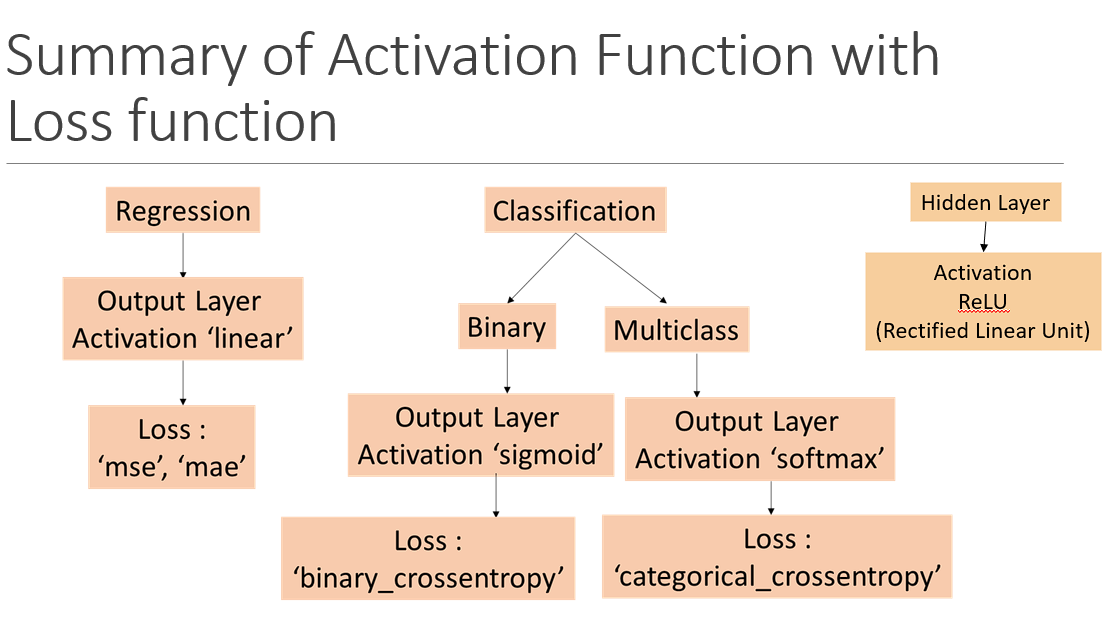

In [16]:
xtrain.shape

(2400, 25)

In [17]:
xtrain.shape[1]

25

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Initialize the neural network
model = Sequential()

# Create hidden layer1
model.add(Dense(units=64, activation='relu', input_shape=(xtrain.shape[1],)))

# Create 2nd hidden layer with 32
model.add(Dense(units=32, activation='relu'))

# Create a output layer
model.add(Dense(units=1, activation='linear'))

### Compile the model

In [20]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [21]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


60/60 [==============================] - 3s 12ms/step - loss: 91814.2266 - mae: 244.9264 - val_loss: 78404.3516 - val_mae: 222.5840
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 89030.0703 - mae: 241.1726 - val_loss: 73567.7188 - val_mae: 215.2718
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 78002.6250 - mae: 224.7048 - val_loss: 58395.9492 - val_mae: 190.3181
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 53650.7852 - mae: 183.0587 - val_loss: 32531.5508 - val_mae: 138.2385
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 23824.4609 - mae: 115.0051 - val_loss: 10255.0557 - val_mae: 72.3912
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 6150.9951 - mae: 55.2554 - val_loss: 2397.5754 - val_mae: 34.9238
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 1724.9520 - mae: 30.8232 - val_loss: 1100.1957 - val_mae: 25.6530
Epoch

### Plot the learning curve

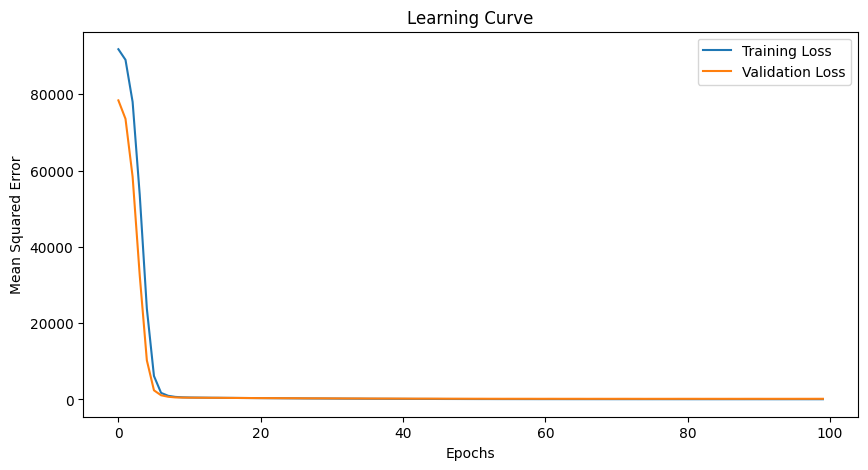

In [22]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model

In [23]:
model.evaluate(xtrain, ytrain)

75/75 [==============================] - 0s 3ms/step - loss: 83.1678 - mae: 6.9610


[83.16776275634766, 6.961000919342041]

In [24]:
model.evaluate(xtest, ytest)

19/19 [==============================] - 0s 4ms/step - loss: 168.7710 - mae: 10.2907


[168.77101135253906, 10.290705680847168]

### predicting values for train and test

In [25]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

19/19 [==============================] - 0s 2ms/step


In [26]:
ypred_tr[0:5]

array([[ 34.713284],
       [192.09485 ],
       [134.08716 ],
       [126.419334],
       [409.01733 ]], dtype=float32)

In [27]:
ytrain.head()

,y
1643,28.003149
137,193.998301
1205,135.648192
523,124.002776
1493,402.889595


In [28]:
ypred_ts[0:5]

array([[-340.99866 ],
       [  34.254444],
       [  50.549854],
       [-439.6447  ],
       [-739.5754  ]], dtype=float32)

In [29]:
ytest.head()

,y
465,-330.280172
904,44.278744
2639,47.049952
2125,-416.384167
1962,-720.979849


### Calculating R2 Score in train and test

In [30]:
from sklearn.metrics import r2_score

In [31]:
tr_r2 = r2_score(ytrain, ypred_tr)
tr_r2

0.9990712566809988

In [32]:
ts_r2 = r2_score(ytest, ypred_ts)
ts_r2

0.9981591396412712

### Saving the neural network model for given dataset

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3777 (14.75 KB)
Trainable params: 3777 (14.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.save('Regression.keras')

### Loading the model

In [35]:
from keras.models import load_model
nn = load_model('Regression.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3777 (14.75 KB)
Trainable params: 3777 (14.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
